XGBoost Model R²: 0.995


c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 44618 (\N{HANGUL SYLLABLE GIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  p

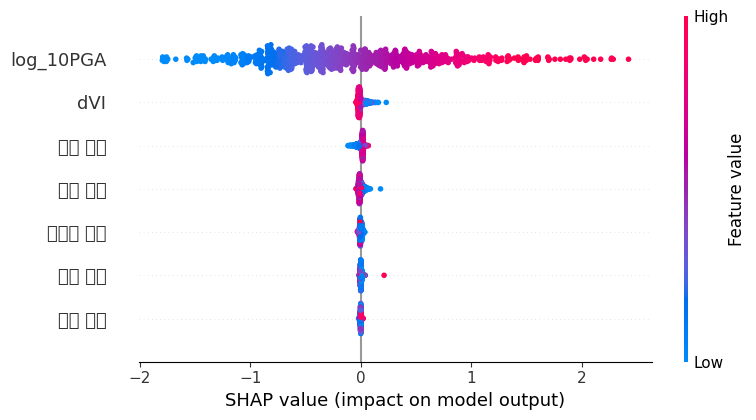

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 로드
file_path = '../earthquake_data/4..xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택
i4_data = data['i4']
X_i4 = i4_data[['지역 규모', '모멘트 규모', '진원 깊이', '진원 거리', '전파 거리', 'dVI', 'log_10PGA']]

# 'o4' 시트에서 정답값 (1열) 선택
o4_data = data['o4']
y_o4 = o4_data['1열']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i4, y_o4, test_size=0.2, random_state=42)

# XGBoost 모델 학습
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# 예측 수행
y_pred = xgb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)
print(f'XGBoost Model R²: {r2:.3f}')

# SHAP 값 계산
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Dependence Plot (특성 간 상호작용 시각화)
# 예시: '지역 규모' 특성에 대한 SHAP 값 시각화
shap.dependence_plot('지역 규모', shap_values, X_test)

# SHAP Force Plot (단일 예측에 대한 SHAP 값 시각화)
# 예시: 첫 번째 테스트 데이터에 대한 Force Plot
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


XGBoost Model R²: 0.825


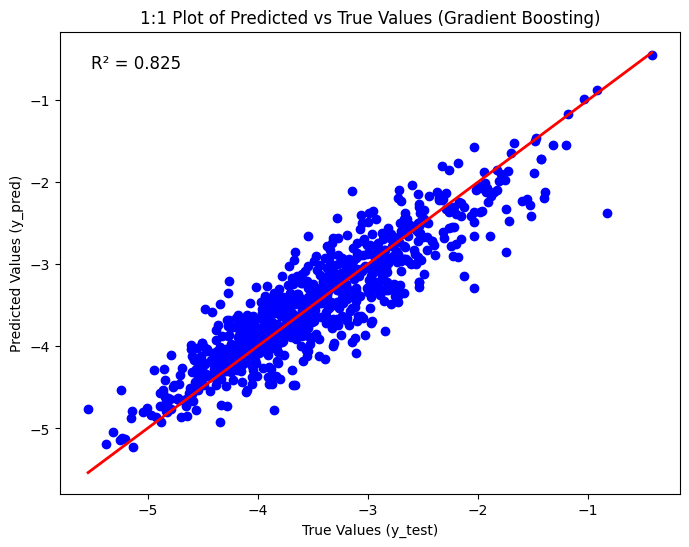

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택
i2_data = data['i2']
X_i2 = i2_data[['지역 규모', '모멘트 규모', '진원 깊이', '진원 거리', '전파 거리', 'dVI', 'Vs30']]

# 'Vs30' 열의 NaN 값 0으로 변경
X_i2['Vs30'] = X_i2['Vs30'].fillna(0)

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1열']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)
print(f'XGBoost Model R²: {r2:.3f}')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('1:1 Plot of Predicted vs True Values (Gradient Boosting)')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


XGBoost Model R²: 0.825


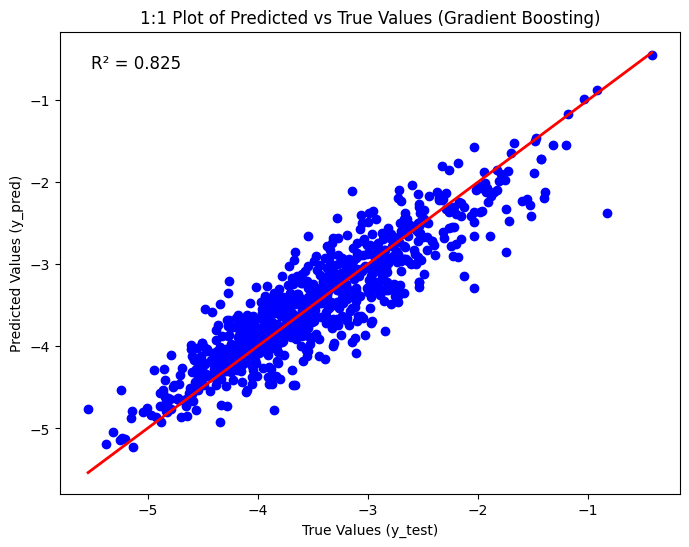

c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 44618 (\N{HANGUL SYLLABLE GIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  p

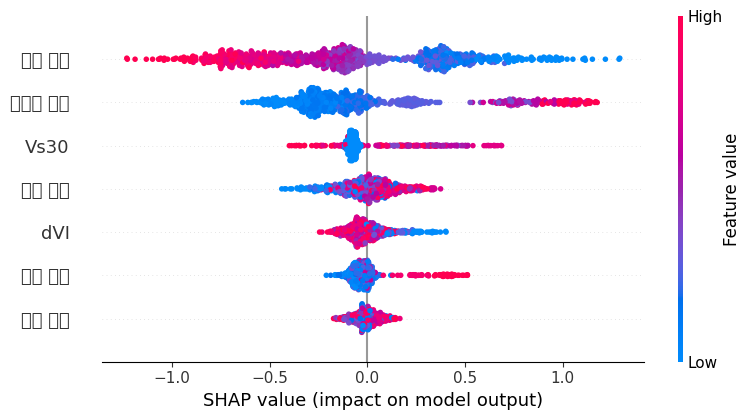

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import shap  # SHAP 라이브러리

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택
i2_data = data['i2']
X_i2 = i2_data[['지역 규모', '모멘트 규모', '진원 깊이', '진원 거리', '전파 거리', 'dVI', 'Vs30']]

# 'Vs30' 열의 NaN 값 0으로 변경
X_i2['Vs30'] = X_i2['Vs30'].fillna(0)

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1열']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)
print(f'XGBoost Model R²: {r2:.3f}')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('1:1 Plot of Predicted vs True Values (Gradient Boosting)')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

# SHAP 값 계산
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Dependence Plot (특성 간 상호작용 시각화)
# 예시: '지역 규모' 특성에 대한 SHAP 값 시각화
shap.dependence_plot('지역 규모', shap_values, X_test)

# SHAP Force Plot (단일 예측에 대한 SHAP 값 시각화)
# 예시: 첫 번째 테스트 데이터에 대한 Force Plot
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


XGBoost Model R²: 0.825


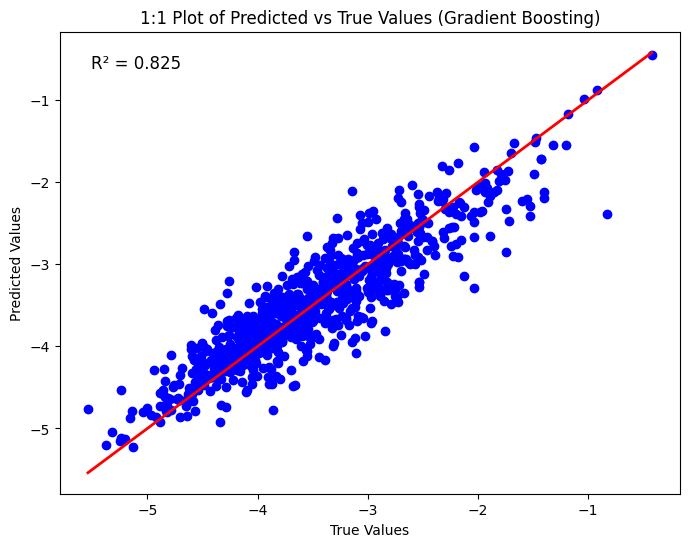

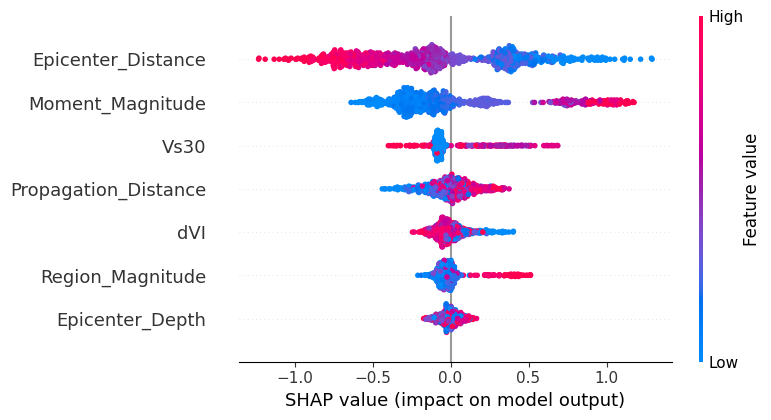

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import shap  # SHAP 라이브러리

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택
i2_data = data['i2']
X_i2 = i2_data[['Region_Magnitude',	'Moment_Magnitude',	'Epicenter_Depth',	'Epicenter_Distance',	'Propagation_Distance',	'dVI',	'Vs30',]]

# 'Vs30' 열의 NaN 값 0으로 변경
X_i2['Vs30'] = X_i2['Vs30'].fillna(0)

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1C']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)
print(f'XGBoost Model R²: {r2:.3f}')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('1:1 Plot of Predicted vs True Values (Gradient Boosting)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

# SHAP 값 계산
shap.initjs()  # Jupyter 환경에서 force plot을 렌더링할 수 있게 해줍니다.
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

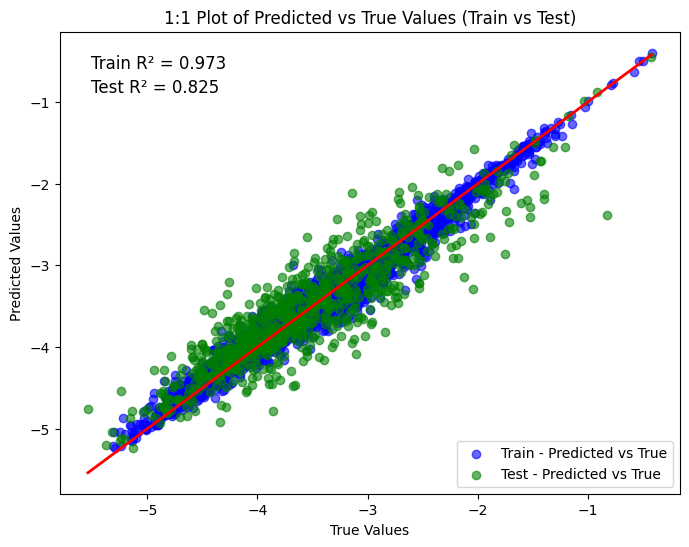

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택
i2_data = data['i2']
X_i2 = i2_data[['Region_Magnitude', 'Moment_Magnitude', 'Epicenter_Depth', 'Epicenter_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'Vs30' 열의 NaN 값 0으로 변경
X_i2['Vs30'] = X_i2['Vs30'].fillna(0)

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1C']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# R² 점수 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# 1대1 플롯 그리기 (훈련 세트와 테스트 세트)
plt.figure(figsize=(8, 6))

# 훈련 세트
plt.scatter(y_train, y_pred_train, color='blue', label='Train - Predicted vs True', alpha=0.6)

# 테스트 세트
plt.scatter(y_test, y_pred_test, color='green', label='Test - Predicted vs True', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (Train vs Test)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# R² 표시
plt.text(0.05, 0.95, f'Train R² = {r2_train:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Test R² = {r2_test:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


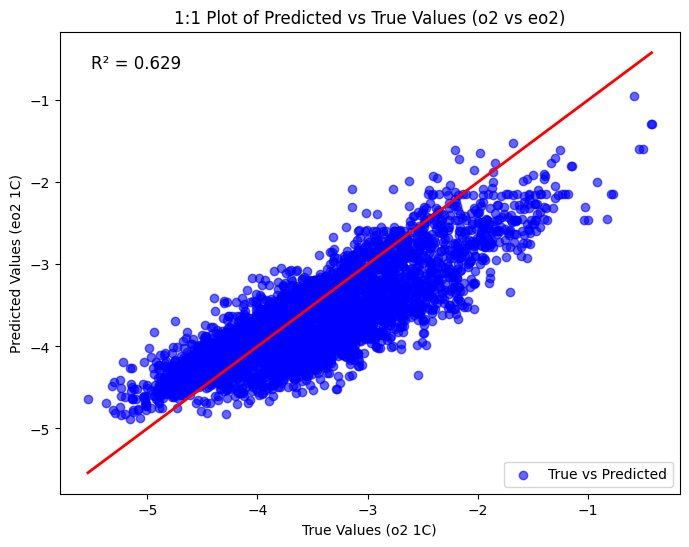

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 데이터 로드
file_path = '../earthquake_data/2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1C']
y_eo2 = eo2_data['1C']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))

# 1대1 플롯 (True 값 vs Predicted 값)
plt.scatter(y_o2, y_eo2, color='blue', label='True vs Predicted', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (o2 vs eo2)')
plt.xlabel('True Values (o2 1C)')
plt.ylabel('Predicted Values (eo2 1C)')

# R² 표시
plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


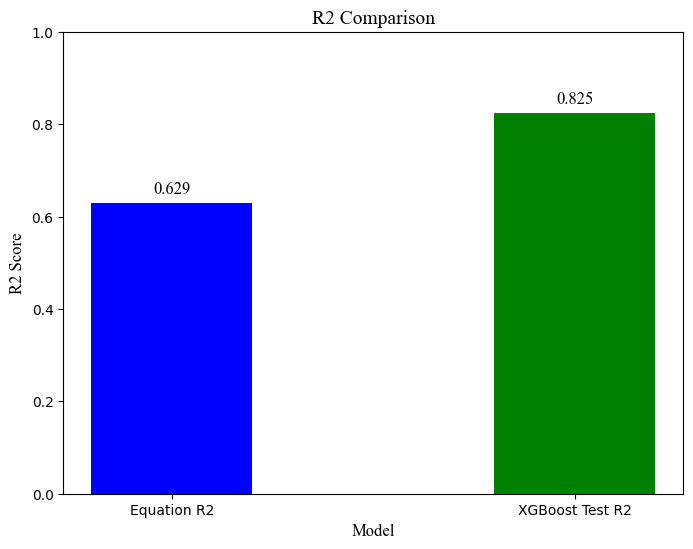

In [29]:
import matplotlib.pyplot as plt

# 데이터 준비
r2_values = [0.629, 0.825]
labels = ['Equation R2', 'XGBoost Test R2']

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 막대그래프 그리기 (막대 너비를 0.4로 설정하여 날씬하게 만들기)
plt.bar(labels, r2_values, color=['blue', 'green'], width=0.4)

# y축 범위 설정
plt.ylim(0, 1)

# 제목과 레이블 설정 (Times New Roman 글꼴, 글꼴 크기 조정)
plt.title('R2 Comparison', fontname='Times New Roman', fontsize=14)
plt.ylabel('R2 Score', fontname='Times New Roman', fontsize=12)
plt.xlabel('Model', fontname='Times New Roman', fontsize=12)

# R² 값을 그래프 위에 표시
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontname='Times New Roman', fontsize=12)

# 그래프 출력
plt.show()
